In [28]:
import pandas as pd

# Define the data for the CSV as a dictionary
data = {
    'Regions': [
        'Zhejiang Province',
        'Jiangsu Province',
        'Shanghai Municipality',
        'Guangdong Province',
        'Beijing Municipality',
        'Tianjin Municipality',
        'Fujian Province',
        'Shandong Province',
        'Liaoning Province',
        'Chongqing Municipality',
        'Henan Province',
        'Jiangxi Province',
        'Hubei Province',
        'Sichuan Province',
        'Hunan Province',
        'Hebei Province',
        'Jilin Province',
        'Hainan Province',
        'Inner Mongolia Autonomous Region',
        'Guangxi Zhuang Autonomous Region',
        'Shanxi Province',
        'Heilongjiang Province',
        'Yunnan Province',
        'Ningxia Hui Autonomous Region',
        'Guizhou Province',
        'Shaanxi Province',
        'Xinjiang Uygur Autonomous Region',
        'Gansu province',
        'Qinghai Province',
        'Tibet Autonomous Region'
    ],
    'MI': [
        11.8, 11.54, 10.96, 10.42, 9.87, 9.43, 9.02, 8.93,
        8.76, 8.14, 8.04, 7.65, 7.65, 7.56, 7.39, 7.27,
        7.09, 6.4, 6.27, 6.17, 6.11, 6.11, 6.06, 5.94,
        5.56, 5.65, 5.12, 4.98, 3.25, 0.38
    ]
}


# Create DataFrame
df = pd.DataFrame(data)

# Specify the CSV file path
csv_file_path = 'MarketizationIndex.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

csv_file_path


'MarketizationIndex.csv'

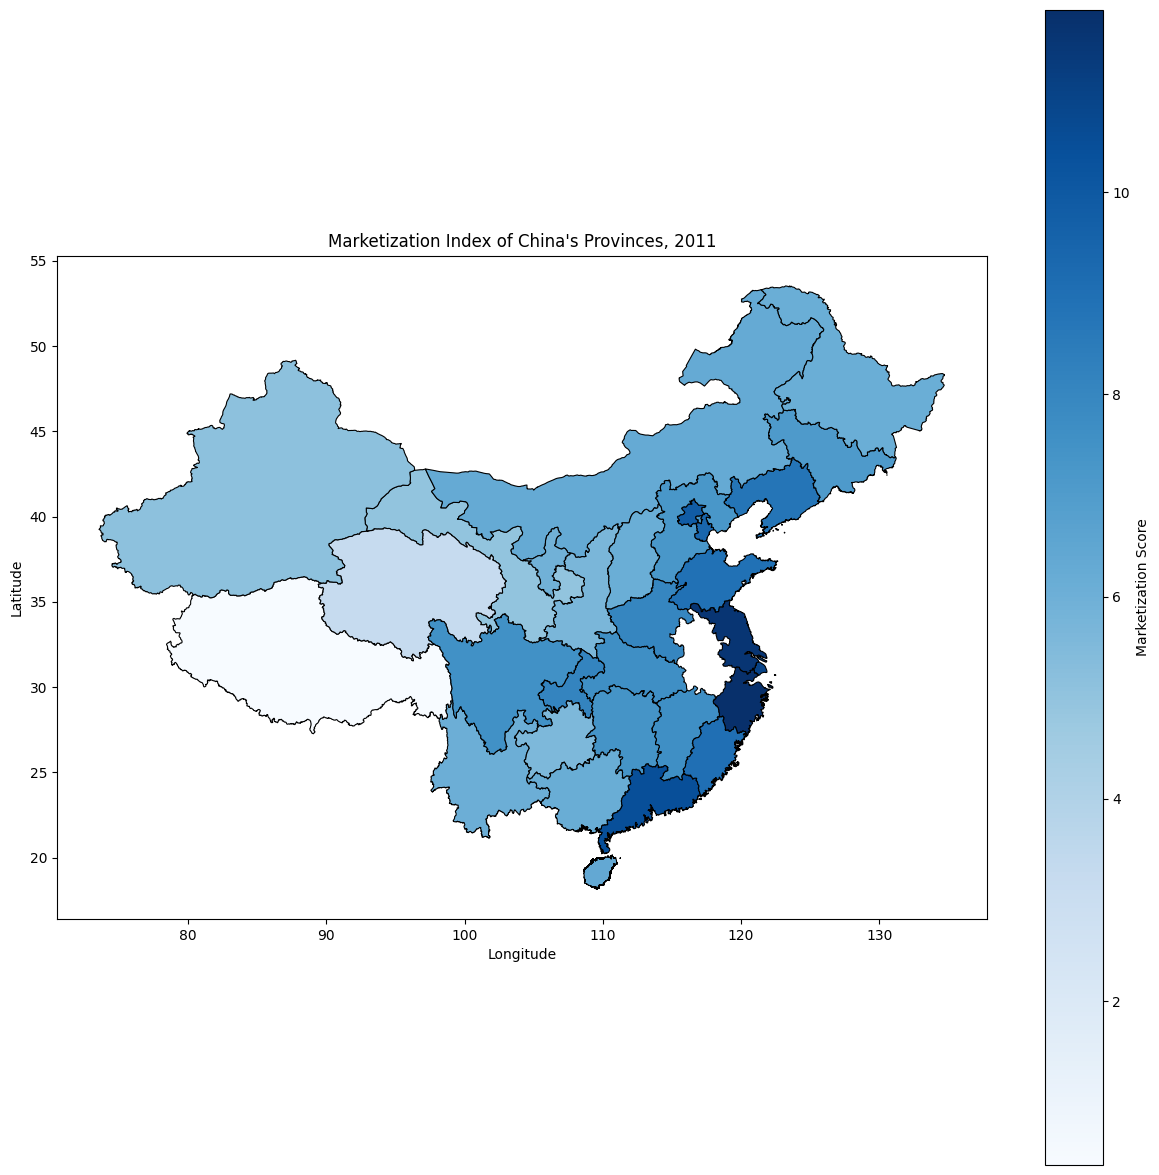

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
gdf = gpd.read_file('chn_admbnda_adm1_ocha_2020.shp')

# Make sure the data is in the same projection (if not, you would need to re-project one of them)
gdf = gdf.to_crs(epsg=4326)

# Assuming you have the marketization index data in a DataFrame called df
# Merge the geographic data with the marketization index data
# (Replace 'province_attribute_in_shapefile' with the actual attribute)
gdf = gdf.merge(df, how='left', left_on='ADM1_EN', right_on='Regions')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf.plot(column='MI', ax=ax, legend=True,
         legend_kwds={'label': "Marketization Score"},
         cmap='Blues',  # Color map
         edgecolor='black', linewidth=0.8)

# Add titles and labels as necessary
plt.title('Marketization Index of China\'s Provinces, 2011')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [ ]:
# Updated coal production data with the new region names provided by the user
updated_coal_production_data = {
    "Province": [
        "Xinjiang Uygur Autonomous Region", "Tibet Autonomous Region", 
        "Inner Mongolia Autonomous Region", "Heilongjiang Province", 
        "Jilin Province", "Liaoning Province", "Hebei Province", 
        "Shandong Province", "Jiangsu Province", "Shanghai Municipality", 
        "Zhejiang Province", "Anhui Province", "Hubei Province", 
        "Hunan Province", "Jiangxi Province", "Fujian Province", 
        "Guangdong Province", "Guangxi Zhuang Autonomous Region", 
        "Hainan Province", "Sichuan Province", "Chongqing Municipality", 
        "Guizhou Province", "Yunnan Province", "Shaanxi Province", 
        "Gansu Province", "Qinghai Province", "Ningxia Hui Autonomous Region", 
        "Henan Province", "Shanxi Province"
    ],
    "Coal Production in 2016 (100 Mt)": [
        ">2.0", "<0.1", ">2.0", "1.0–2.0", "0.1–0.5", "0.5–1.0",
        "1.0–2.0", "1.0–2.0", "<0.1", "<0.1", "<0.1", "0.5–1.0",
        "<0.1", "<0.1", "<0.1", "<0.1", "<0.1", "<0.1",
        "<0.1", "0.1–0.5", "<0.1", "0.5–1.0", "0.1–0.5", ">2.0",
        "0.1–0.5", "<0.1", "0.5–1.0", "0.5–1.0", "1.0–2.0"
    ]
}

# Convert the updated coal production data to a DataFrame
df_updated = pd.DataFrame(updated_coal_production_data)

# Define the CSV file path
updated_csv_file_path = '/mnt/data/updated_coal_production_per_province.csv'

# Write the DataFrame to a CSV file
df_updated.to_csv(updated_csv_file_path, index=False)

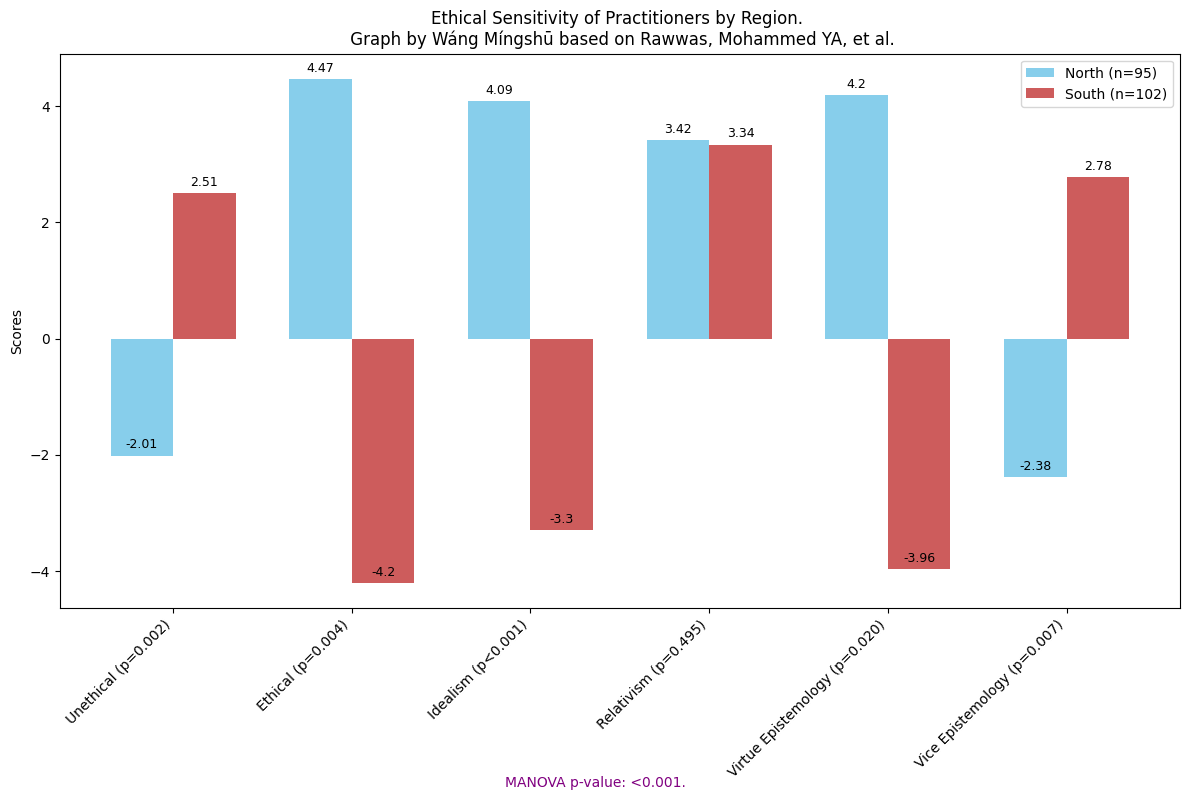

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
categories = ['Unethical (p=0.002)', 'Ethical (p=0.004)', 'Idealism (p<0.001)', 'Relativism (p=0.495)',
              'Virtue Epistemology (p=0.020)', 'Vice Epistemology (p=0.007)']
north_means = [-2.013, 4.467, 4.087, 3.416, 4.195, -2.380]
south_means = [2.509, -4.203, -3.300, 3.339, -3.958, 2.778]
manova_p_value = '<0.001'  # MANOVA p-value
north_sample_size = 95
south_sample_size = 102

# Positioning of the bars on the x-axis
x = np.arange(len(categories))

# Width of a bar
width = 0.35

# Creating the figure and the axes
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted for better fit

# Plotting data
north_bars = ax.bar(x - width/2, north_means, width, color='SkyBlue', label=f'North (n={north_sample_size})')
south_bars = ax.bar(x + width/2, south_means, width, color='IndianRed', label=f'South (n={south_sample_size})')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Ethical Sensitivity of Practitioners by Region. \n Graph by Wáng Míngshū based on Rawwas, Mohammed YA, et al.')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right", fontsize=10)
ax.legend()

# Helper function to label the bars with their height
def label_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Calling the function to label the bars
label_bars(north_bars)
label_bars(south_bars)

# Adding MANOVA p-value as a caption
fig.text(0.5, 0.01, f'MANOVA p-value: {manova_p_value}.', ha='center', fontsize=10, color='purple')

# Adjust layout to make room for the rotated x-axis labels
fig.tight_layout()

plt.show()


In [ ]:
corporate_enterprises_by_region = {
    "National Total": {
        "Numbers of Enterprises": 18097682,
        "State-holding": 325800,
        "Collective-holding": 249946,
        "Private-holding": 16204143,
        "Hong Kong, Macao and Taiwan-holding": 113103,
        "Foreign-holding": 111628,
        "Others": 1093062
    },
    "Beijing Municipality": {
        "Numbers of Enterprises": 676829,
        "State-holding": 17711,
        "Collective-holding": 18961,
        "Private-holding": 605577,
        "Hong Kong, Macao and Taiwan-holding": 6148,
        "Foreign-holding": 9114,
        "Others": 19318
    },
    "Tianjin Municipality": {
        "Numbers of Enterprises": 414784,
        "State-holding": 8879,
        "Collective-holding": 5516,
        "Private-holding": 333849,
        "Hong Kong, Macao and Taiwan-holding": 2069,
        "Foreign-holding": 4089,
        "Others": 60382
    },
    "Hebei Province": {
        "Numbers of Enterprises": 954073,
        "State-holding": 10473,
        "Collective-holding": 8461,
        "Private-holding": 909843,
        "Hong Kong, Macao and Taiwan-holding": 699,
        "Foreign-holding": 1341,
        "Others": 23256
    },
    "Shanxi Province": {
        "Numbers of Enterprises": 429757,
        "State-holding": 11060,
        "Collective-holding": 6299,
        "Private-holding": 405243,
        "Hong Kong, Macao and Taiwan-holding": 212,
        "Foreign-holding": 305,
        "Others": 6638
    },
    "Inner Mongolia Autonomous Region": {
        "Numbers of Enterprises": 222801,
        "State-holding": 5722,
        "Collective-holding": 2149,
        "Private-holding": 196315,
        "Hong Kong, Macao and Taiwan-holding": 143,
        "Foreign-holding": 199,
        "Others": 18273
    },
    "Liaoning Province": {
        "Numbers of Enterprises": 543275,
        "State-holding": 14058,
        "Collective-holding": 14203,
        "Private-holding": 457248,
        "Hong Kong, Macao and Taiwan-holding": 1900,
        "Foreign-holding": 4517,
        "Others": 51349
    },
    "Jilin Province": {
        "Numbers of Enterprises": 141199,
        "State-holding": 5790,
        "Collective-holding": 2782,
        "Private-holding": 120238,
        "Hong Kong, Macao and Taiwan-holding": 204,
        "Foreign-holding": 538,
        "Others": 11647
    },
    "Heilongjiang Province": {
        "Numbers of Enterprises": 223467,
        "State-holding": 8225,
        "Collective-holding": 4233,
        "Private-holding": 196814,
        "Hong Kong, Macao and Taiwan-holding": 323,
        "Foreign-holding": 517,
        "Others": 13355
    },
    "Shanghai Municipality": {
        "Numbers of Enterprises": 453393,
        "State-holding": 11706,
        "Collective-holding": 9850,
        "Private-holding": 380614,
        "Hong Kong, Macao and Taiwan-holding": 12693,
        "Foreign-holding": 20590,
        "Others": 17940
    },
    "Jiangsu Province": {
        "Numbers of Enterprises": 2148335,
        "State-holding": 22014,
        "Collective-holding": 1761,
        "Private-holding": 1983808,
        "Hong Kong, Macao and Taiwan-holding": 13489,
        "Foreign-holding": 17838,
        "Others": 94025
    },
    "Zhejiang Province": {
        "Numbers of Enterprises": 1599310,
        "State-holding": 12991,
        "Collective-holding": 23365,
        "Private-holding": 1533668,
        "Hong Kong, Macao and Taiwan-holding": 8843,
        "Foreign-holding": 11026,
        "Others": 9399
    },
    "Anhui Province": {
        "Numbers of Enterprises": 727017,
        "State-holding": 12738,
        "Collective-holding": 7738,
        "Private-holding": 642934,
        "Hong Kong, Macao and Taiwan-holding": 1057,
        "Foreign-holding": 1139,
        "Others": 61411
    },
    "Fujian Province": {
        "Numbers of Enterprises": 748141,
        "State-holding": 12632,
        "Collective-holding": 902,
        "Private-holding": 650640,
        "Hong Kong, Macao and Taiwan-holding": 9808,
        "Foreign-holding": 4475,
        "Others": 61554
    },
    "Jiangxi Province": {
        "Numbers of Enterprises": 439890,
        "State-holding": 9764,
        "Collective-holding": 7105,
        "Private-holding": 385919,
        "Hong Kong, Macao and Taiwan-holding": 1584,
        "Foreign-holding": 706,
        "Others": 34812
    },
    "Shandong Province": {
        "Numbers of Enterprises": 1676178,
        "State-holding": 18645,
        "Collective-holding": 15208,
        "Private-holding": 1558518,
        "Hong Kong, Macao and Taiwan-holding": 3560,
        "Foreign-holding": 10902,
        "Others": 69345
    },
    "Henan Province": {
        "Numbers of Enterprises": 695953,
        "State-holding": 14556,
        "Collective-holding": 9733,
        "Private-holding": 605195,
        "Hong Kong, Macao and Taiwan-holding": 741,
        "Foreign-holding": 673,
        "Others": 65055
    },
    "Hubei Province": {
        "Numbers of Enterprises": 751526,
        "State-holding": 13511,
        "Collective-holding": 8002,
        "Private-holding": 680305,
        "Hong Kong, Macao and Taiwan-holding": 1628,
        "Foreign-holding": 1764,
        "Others": 46316
    },
    "Hunan Province": {
        "Numbers of Enterprises": 502984,
        "State-holding": 12911,
        "Collective-holding": 7841,
        "Private-holding": 428709,
        "Hong Kong, Macao and Taiwan-holding": 931,
        "Foreign-holding": 663,
        "Others": 51929
    },
    "Guangdong Province": {
        "Numbers of Enterprises": 1752016,
        "State-holding": 24617,
        "Collective-holding": 27579,
        "Private-holding": 1463030,
        "Hong Kong, Macao and Taiwan-holding": 42118,
        "Foreign-holding": 15689,
        "Others": 179883
    },
    "Guangxi Zhuang Autonomous Region": {
        "Numbers of Enterprises": 409008,
        "State-holding": 7043,
        "Collective-holding": 5452,
        "Private-holding": 387506,
        "Hong Kong, Macao and Taiwan-holding": 1020,
        "Foreign-holding": 967,
        "Others": 7020
    },
    "Hainan Province": {
        "Numbers of Enterprises": 77662,
        "State-holding": 2592,
        "Collective-holding": 1395,
        "Private-holding": 62322,
        "Hong Kong, Macao and Taiwan-holding": 404,
        "Foreign-holding": 241,
        "Others": 10708
    },
    "Chongqing Municipality": {
        "Numbers of Enterprises": 520514,
        "State-holding": 7988,
        "Collective-holding": 3443,
        "Private-holding": 480917,
        "Hong Kong, Macao and Taiwan-holding": 1019,
        "Foreign-holding": 946,
        "Others": 26201
    },
    "Sichuan Province": {
        "Numbers of Enterprises": 401716,
        "State-holding": 11682,
        "Collective-holding": 8320,
        "Private-holding": 327439,
        "Hong Kong, Macao and Taiwan-holding": 797,
        "Foreign-holding": 940,
        "Others": 52538
    },
    "Guizhou Province": {
        "Numbers of Enterprises": 342972,
        "State-holding": 9604,
        "Collective-holding": 4877,
        "Private-holding": 304496,
        "Hong Kong, Macao and Taiwan-holding": 299,
        "Foreign-holding": 212,
        "Others": 23484
    },
    "Yunnan Province": {
        "Numbers of Enterprises": 457374,
        "State-holding": 9558,
        "Collective-holding": 6341,
        "Private-holding": 422374,
        "Hong Kong, Macao and Taiwan-holding": 597,
        "Foreign-holding": 979,
        "Others": 17525
    },
    "Tibet Autonomous Region": {
        "Numbers of Enterprises": 9461,
        "State-holding": 1016,
        "Collective-holding": 677,
        "Private-holding": 6909,
        "Hong Kong, Macao and Taiwan-holding": 20,
        "Foreign-holding": 17,
        "Others": 822
    },
    "Shaanxi Province": {
        "Numbers of Enterprises": 333776,
        "State-holding": 10722,
        "Collective-holding": 7727,
        "Private-holding": 290534,
        "Hong Kong, Macao and Taiwan-holding": 412,
        "Foreign-holding": 765,
        "Others": 23616
    },
    "Gansu Province": {
        "Numbers of Enterprises": 127899,
        "State-holding": 4951,
        "Collective-holding": 3210,
        "Private-holding": 103305,
        "Hong Kong, Macao and Taiwan-holding": 96,
        "Foreign-holding": 86,
        "Others": 16251
    },
    "Qinghai Province": {
        "Numbers of Enterprises": 76169,
        "State-holding": 2124,
        "Collective-holding": 836,
        "Private-holding": 70210,
        "Hong Kong, Macao and Taiwan-holding": 75,
        "Foreign-holding": 93,
        "Others": 2831
    },
    "Ningxia Hui Autonomous Region": {
        "Numbers of Enterprises": 63463,
        "State-holding": 1295,
        "Collective-holding": 394,
        "Private-holding": 59877,
        "Hong Kong, Macao and Taiwan-holding": 65,
        "Foreign-holding": 72,
        "Others": 1760
    },
    "Xinjiang Uygur Autonomous Region": {
        "Numbers of Enterprises": 176740,
        "State-holding": 9222,
        "Collective-holding": 2067,
        "Private-holding": 149769,
        "Hong Kong, Macao and Taiwan-holding": 149,
        "Foreign-holding": 225,
        "Others": 15308
    }
}


In [ ]:
provincial_inequality_since_1978 = {
    "Hebei": {
        "Region": "Coastal",
        "1978 level": 364,
        "Ratio to Shanghai, 1978": 0.15,
        "Ratio to Shanghai, 1990": 0.16,
        "Ratio to Shanghai, 2016": 0.24,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.07,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.10
    },
    "Gansu": {
        "Region": "Western",
        "1978 level": 348,
        "Ratio to Shanghai, 1978": 0.14,
        "Ratio to Shanghai, 1990": 0.15,
        "Ratio to Shanghai, 2016": 0.19,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.07,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.10
    },
    "Hubei": {
        "Region": "Middle",
        "1978 level": 332,
        "Ratio to Shanghai, 1978": 0.13,
        "Ratio to Shanghai, 1990": 0.17,
        "Ratio to Shanghai, 2016": 0.28,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.08,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.11
    },
    "Zhejiang": {
        "Region": "Coastal",
        "1978 level": 331,
        "Ratio to Shanghai, 1978": 0.13,
        "Ratio to Shanghai, 1990": 0.23,
        "Ratio to Shanghai, 2016": 0.41,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.11,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.11
    },
    "Inner Mongolia": {
        "Region": "Western",
        "1978 level": 317,
        "Ratio to Shanghai, 1978": 0.13,
        "Ratio to Shanghai, 1990": 0.17,
        "Ratio to Shanghai, 2016": 0.39,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.08,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.12
    },
    "Shandong": {
        "Region": "Coastal",
        "1978 level": 316,
        "Ratio to Shanghai, 1978": 0.13,
        "Ratio to Shanghai, 1990": 0.17,
        "Ratio to Shanghai, 2016": 0.35,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.09,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.12
    },
    "Hainan": {
        "Region": "Coastal",
        "1978 level": 314,
        "Ratio to Shanghai, 1978": 0.13,
        "Ratio to Shanghai, 1990": 0.20,
        "Ratio to Shanghai, 2016": 0.27,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.10,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.10
    },
    "Xinjiang": {
        "Region": "Western",
        "1978 level": 313,
        "Ratio to Shanghai, 1978": 0.13,
        "Ratio to Shanghai, 1990": 0.18,
        "Ratio to Shanghai, 2016": 0.16,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.09,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.08
    },
    "Shaanxi": {
        "Region": "Western",
        "1978 level": 291,
        "Ratio to Shanghai, 1978": 0.12,
        "Ratio to Shanghai, 1990": 0.15,
        "Ratio to Shanghai, 2016": 0.22,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.08,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.11
    },
    "Hunan": {
        "Region": "Middle",
        "1978 level": 286,
        "Ratio to Shanghai, 1978": 0.12,
        "Ratio to Shanghai, 1990": 0.12,
        "Ratio to Shanghai, 2016": 0.17,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.06,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.10
    },
    "Jiangxi": {
        "Region": "Middle",
        "1978 level": 276,
        "Ratio to Shanghai, 1978": 0.11,
        "Ratio to Shanghai, 1990": 0.13,
        "Ratio to Shanghai, 2016": 0.18,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.07,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.10
    },
    "Fujian": {
        "Region": "Coastal",
        "1978 level": 273,
        "Ratio to Shanghai, 1978": 0.11,
        "Ratio to Shanghai, 1990": 0.17,
        "Ratio to Shanghai, 2016": 0.34,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.10,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.12
    },
    "Sichuan": {
        "Region": "Western",
        "1978 level": 261,
        "Ratio to Shanghai, 1978": 0.11,
        "Ratio to Shanghai, 1990": 0.13,
        "Ratio to Shanghai, 2016": 0.21,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.08,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.11
    },
    "Chongqing": {
        "Region": "Western",
        "1978 level": 269,
        "Ratio to Shanghai, 1978": 0.11,
        "Ratio to Shanghai, 1990": 0.13,
        "Ratio to Shanghai, 2016": 0.27,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.08,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.12
    },
    "Anhui": {
        "Region": "Middle",
        "1978 level": 244,
        "Ratio to Shanghai, 1978": 0.10,
        "Ratio to Shanghai, 1990": 0.12,
        "Ratio to Shanghai, 2016": 0.20,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.08,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.11
    },
    "Henan": {
        "Region": "Middle",
        "1978 level": 232,
        "Ratio to Shanghai, 1978": 0.09,
        "Ratio to Shanghai, 1990": 0.13,
        "Ratio to Shanghai, 2016": 0.20,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.08,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.11
    },
    "Yunnan": {
        "Region": "Western",
        "1978 level": 226,
        "Ratio to Shanghai, 1978": 0.09,
        "Ratio to Shanghai, 1990": 0.12,
        "Ratio to Shanghai, 2016": 0.13,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.08,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.09
    },
    "Guangxi": {
        "Region": "Western",
        "1978 level": 225,
        "Ratio to Shanghai, 1978": 0.09,
        "Ratio to Shanghai, 1990": 0.08,
        "Ratio to Shanghai, 2016": 0.13,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.05,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.10
    },
    "Guizhou": {
        "Region": "Western",
        "1978 level": 175,
        "Ratio to Shanghai, 1978": 0.07,
        "Ratio to Shanghai, 1990": 0.09,
        "Ratio to Shanghai, 2016": 0.11,
        "Average Growth of real GDP per capita 1978-1990 (fraction)": 0.08,
        "Average Growth of real GDP per capita 1990-2016 (fraction)": 0.10
    }
}

In [ ]:
# Define the mapping based on the proper names you provided
proper_names_mapping = {
    "Zhejiang": "Zhejiang Province",
    "Jiangsu": "Jiangsu Province",
    "Shanghai": "Shanghai Municipality",
    "Guangdong": "Guangdong Province",
    "Beijing": "Beijing Municipality",
    "Tianjin": "Tianjin Municipality",
    "Fujian": "Fujian Province",
    "Shandong": "Shandong Province",
    "Liaoning": "Liaoning Province",
    "Chongqing": "Chongqing Municipality",
    "Henan": "Henan Province",
    "Jiangxi": "Jiangxi Province",
    "Hubei": "Hubei Province",
    "Sichuan": "Sichuan Province",
    "Hunan": "Hunan Province",
    "Hebei": "Hebei Province",
    "Jilin": "Jilin Province",
    "Hainan": "Hainan Province",
    "Inner Mongolia": "Inner Mongolia Autonomous Region",
    "Guangxi": "Guangxi Zhuang Autonomous Region",
    "Shanxi": "Shanxi Province",
    "Heilongjiang": "Heilongjiang Province",
    "Yunnan": "Yunnan Province",
    "Ningxia": "Ningxia Hui Autonomous Region",
    "Guizhou": "Guizhou Province",
    "Shaanxi": "Shaanxi Province",
    "Xinjiang": "Xinjiang Uygur Autonomous Region",
    "Gansu": "Gansu Province",
    "Qinghai": "Qinghai Province",
    "Tibet": "Tibet Autonomous Region"
}

# Function to update dataset keys based on the mapping
def update_keys_with_proper_names(dataset, mapping):
    updated_dataset = {}
    for key, value in dataset.items():
        proper_key = mapping.get(key, key)  # Use the proper name if it exists in the mapping, else keep the original
        updated_dataset[proper_key] = value
    return updated_dataset

# Update the keys for both datasets
corporate_enterprises_by_region_updated = update_keys_with_proper_names(corporate_enterprises_by_region, proper_names_mapping)
provincial_inequality_since_1978_updated = update_keys_with_proper_names(provincial_inequality_since_1978, proper_names_mapping)

# Now, both datasets will use the proper names for regions.
